In [1]:
from helper import *

In [8]:
Nr = 30
Nc = 30
N = Nr*Nc

l=0.5

ising = Ising(Nr, Nc, 0, 0, 1, l)

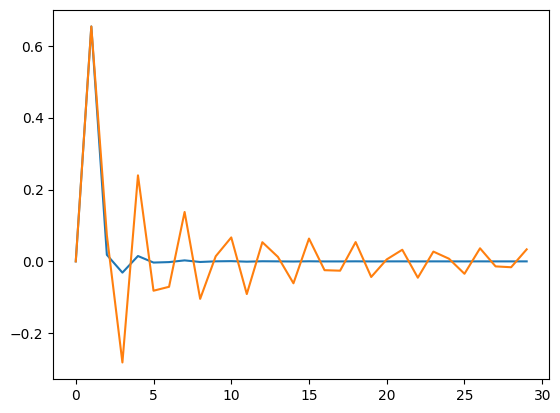

In [9]:
plt.plot(np.arange(Nc), ising.Jij[0,:Nc])
plt.plot(np.arange(Nc), ising.Jij[0,:Nc]*np.arange(Nc)**2)

In [10]:
Nr = 30
Nc = 30
N = Nr*Nc

J2_list = np.array([0.])
l_list = np.array([0.3, 0.5, 0.75, 1.0, 1.25, 1.5])
T_list = np.array([15, 12, 10, 8, 6, 5, 4, 3, 2, 1])

h = 0.

Nwarmup = 10*N
Ncycle = 1000
Lcycle = 5*N

for l in l_list:
    run_script(Nr, Nc, J2_list, T_list, h, l, Nwarmup, Ncycle, Lcycle, tag='rkky2_SEm_Nc%i'%(Ncycle), meas_config=False, meas_M=False, meas_E=False, meas_S=False, meas_SEm=True)


[15 12 10  8  6  5  4  3  2  1]
Beginning simulation for J2=0.000000, T=15.000000
Warming up
Starting cycles
0.4020 complete, ETA 1.49m
0.7660 complete, ETA 0.61m
J2: 0.00, Temp: 15.00, Time: 159.801s
Beginning simulation for J2=0.000000, T=12.000000
Warming up
Starting cycles
0.3510 complete, ETA 1.85m
0.6800 complete, ETA 0.94m
J2: 0.00, Temp: 12.00, Time: 178.094s
Beginning simulation for J2=0.000000, T=10.000000
Warming up
Starting cycles
0.3100 complete, ETA 2.23m
0.6510 complete, ETA 1.07m
0.9990 complete, ETA 0.00m
J2: 0.00, Temp: 10.00, Time: 180.639s
Beginning simulation for J2=0.000000, T=8.000000
Warming up
Starting cycles
0.4360 complete, ETA 1.30m
0.8750 complete, ETA 0.29m
J2: 0.00, Temp: 8.00, Time: 136.485s
Beginning simulation for J2=0.000000, T=6.000000
Warming up
Starting cycles
0.3080 complete, ETA 2.25m
0.6290 complete, ETA 1.18m
0.9850 complete, ETA 0.05m
J2: 0.00, Temp: 6.00, Time: 183.227s
Beginning simulation for J2=0.000000, T=5.000000
Warming up
Starting cycl

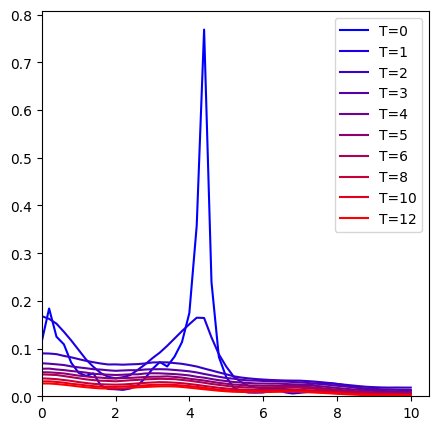

In [30]:
l = 0.95

with h5py.File('data/rkky_Sem_Nc1000-l%.2f-J20.00-h0.00-N900.h5'%(l), 'r') as f:
    T_list = np.array(f['T_list'], dtype=float)
    SEm_array = np.array(f['SEm_array'])
    
eps = 0.05

Nw = 51

nT = len(T_list)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

w_list = np.linspace(0,10,num=Nw)

for i in range(nT-1, 0, -1):
    
    beta = 1/T_list[i]
    Em = SEm_array[i]

    S_list = np.zeros((Nw))
    for j in range(Nw):
        S_list[j] = np.mean(np.divide((1-np.exp(-beta*Em)), Em, out=np.full((len(Em)), beta), where=Em!=0) * (eps/((w_list[j]-Em)**2 + eps**2)))
    ax.plot(w_list, S_list, color=(1-(i-1)/(nT-2), 0, (i-1)/(nT-2)), label='T=%i'%T_list[i])

ax.set_ybound(lower=0)
ax.set_xbound(lower=0)
ax.legend()    

# fig.savefig('figures/rkky_optcond_l%.2f.pdf'%(l),dpi=300,bbox_inches="tight")